In [0]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# Visualizations
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [2]:
df= pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
df.shape

(32561, 15)

In [0]:
#Mapping binary values to the expected output

df['income']=df['income'].map({'<=50K': 0, '>50K': 1})

In [5]:
#Replacing question marks in dataset with null values

df[df == '?'] = np.nan

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [6]:
#Finding what percentage of data is missing from the dataset

total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
occupation,1843,5.7
workclass,1836,5.6
native.country,583,1.8
income,0,0.0
hours.per.week,0,0.0


In [7]:
#Since a very small amount of data is missing, we can replace the null values with the mode of each column

df['occupation'].describe()

count              30718
unique                14
top       Prof-specialty
freq                4140
Name: occupation, dtype: object

In [0]:
#Since mode is Prof-specialty, replacing null values with it

df['occupation'] = df['occupation'].fillna('Prof-specialty')

In [9]:
df['workclass'].describe()

count       30725
unique          8
top       Private
freq        22696
Name: workclass, dtype: object

In [0]:
#Since mode is Private, replacing null values with it

df['workclass'] = df['workclass'].fillna('Private')

In [11]:
df['native.country'].describe()

count             31978
unique               41
top       United-States
freq              29170
Name: native.country, dtype: object

In [0]:
#Since mode is United-States, replacing null values with it

df['native.country'] = df['native.country'].fillna('United-States')

In [13]:
#Mean, Median, Minimum , Maximum values etc can be found

df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [14]:
df.describe(include=["O"])

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
count,32561,32561,32561,32561,32561,32561,32561,32561
unique,8,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,24532,10501,14976,5983,13193,27816,21790,29753


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f33f766f358>,
      dtype=object)

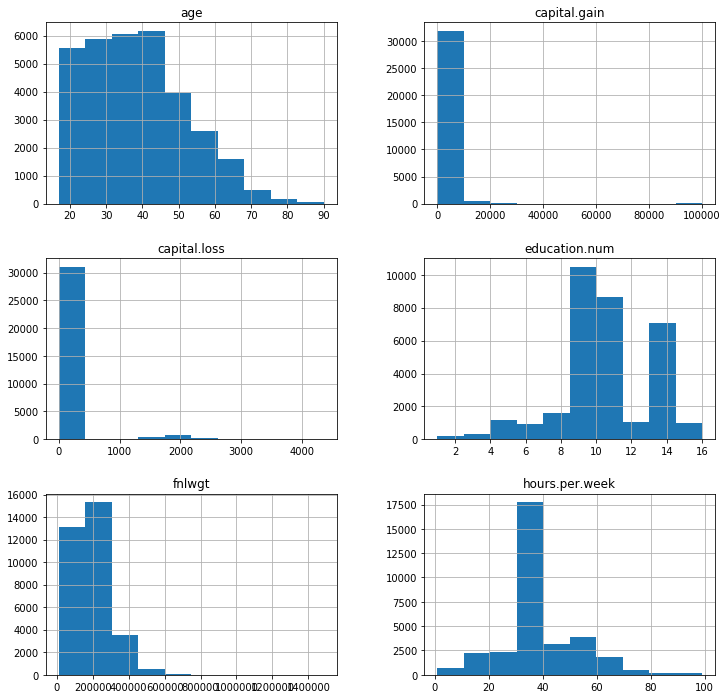

In [15]:
#Visualizing the numerical features of the dataset using histograms to analyze the distribution of those features in the dataset

rcParams['figure.figsize'] = 12, 12
df[['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']].hist()

#Can visualise that data such as capital gain, capitaln loss, fnlwgt is right skewed an other columns can be grouped for better visualisation

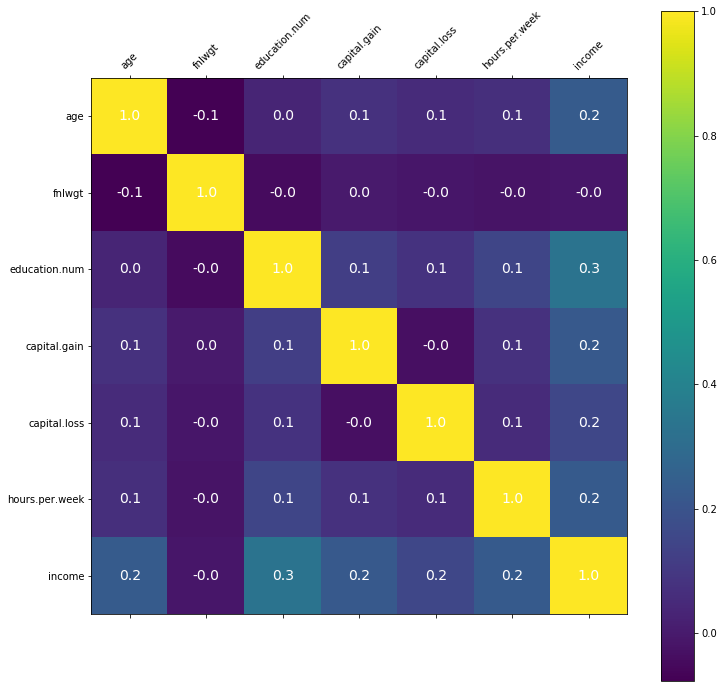

In [16]:
#Ploting the correlation between the output(income) and individual features

plt.matshow(df.corr())
plt.colorbar()
plt.xticks(np.arange(len(df.corr().columns)), df.corr().columns.values, rotation = 45) 
plt.yticks(np.arange(len(df.corr().columns)), df.corr().columns.values) 
for (i, j), corr in np.ndenumerate(df.corr()):
    plt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='white', fontsize=14)


In [0]:
#Since it has 0 correlation, it can be dropped

df.drop(['fnlwgt'], axis = 1, inplace = True)

In [0]:
dataset=df.copy()

In [0]:
#Distributing Age column in 3 significant parts and plotting it corresponding to the output feature(income)

dataset['age'] = pd.cut(dataset['age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])

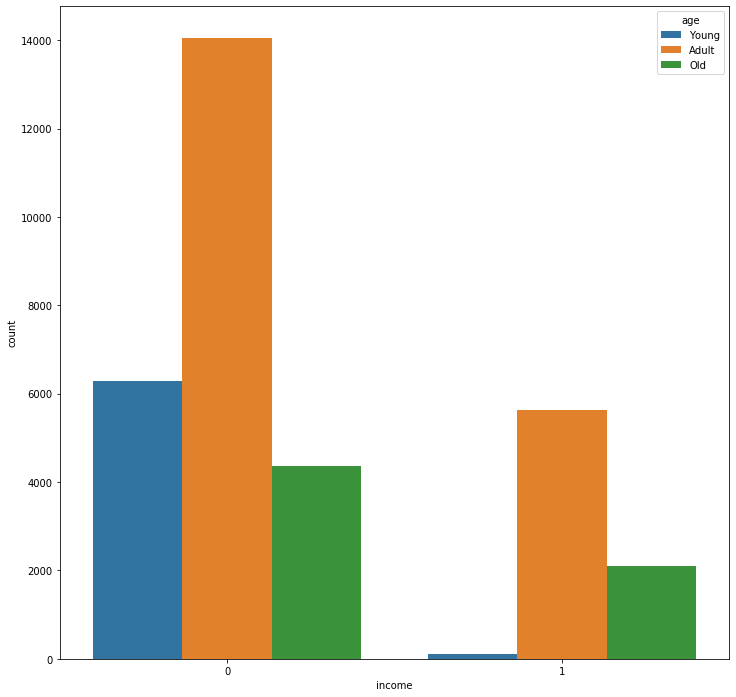

In [20]:
sns.countplot(x = 'income', hue = 'age', data = dataset)

In [0]:
#Capital gain and capital loss can be combined and transformed into a feature capital difference. Plotting the new feature corresponding to income

dataset['Capital Diff'] = dataset['capital.gain'] - dataset['capital.loss']
dataset.drop(['capital.gain'], axis = 1, inplace = True)
dataset.drop(['capital.loss'], axis = 1, inplace = True)

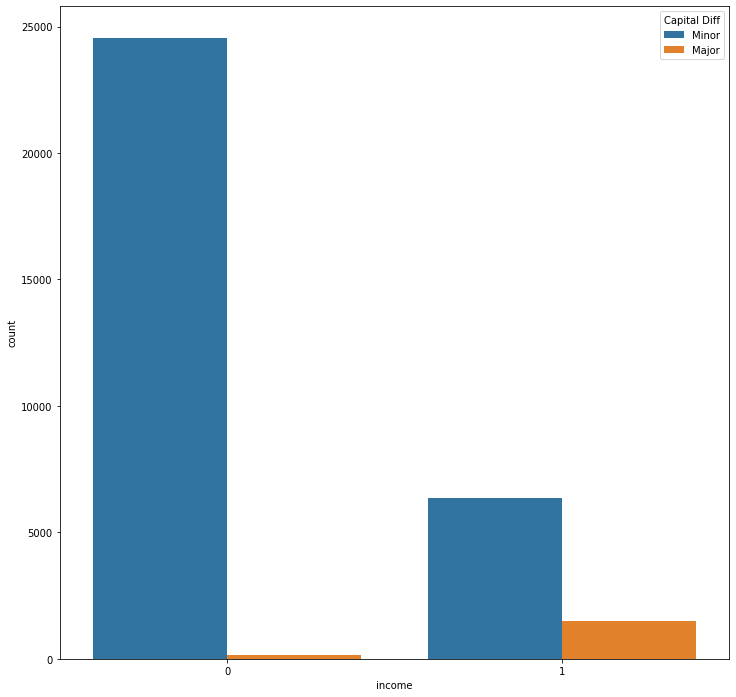

In [22]:
dataset['Capital Diff'] = pd.cut(dataset['Capital Diff'], bins = [-5000, 5000, 100000], labels = ['Minor', 'Major'])
sns.countplot(x = 'income', hue = 'Capital Diff', data = dataset)

In [0]:
#Dividing hours of week in 3 major range and plotting it corresponding to the income

dataset['Hours per Week'] = pd.cut(dataset['hours.per.week'], 
                                   bins = [0, 30, 40, 100], 
                                   labels = ['Lesser Hours', 'Normal Hours', 'Extra Hours'])

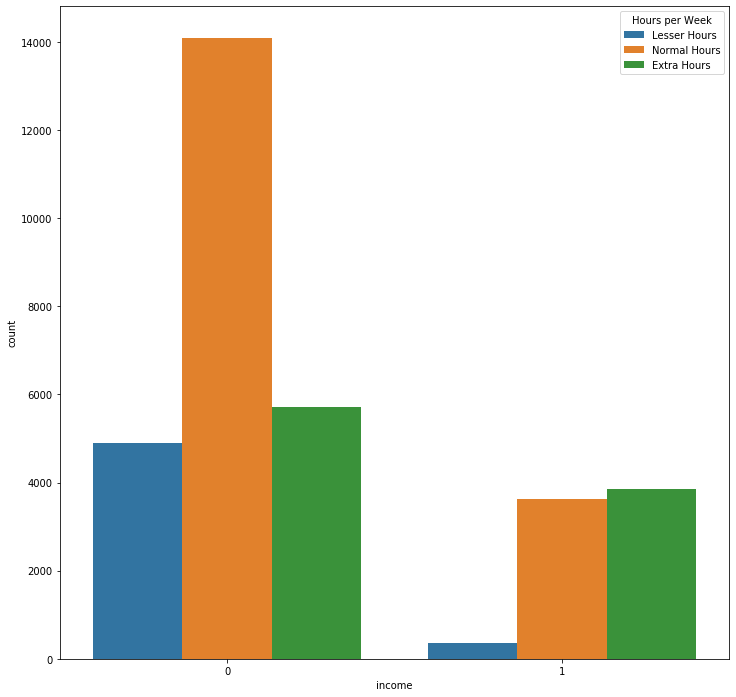

In [24]:
sns.countplot(x = 'income', hue = 'Hours per Week', data = dataset)


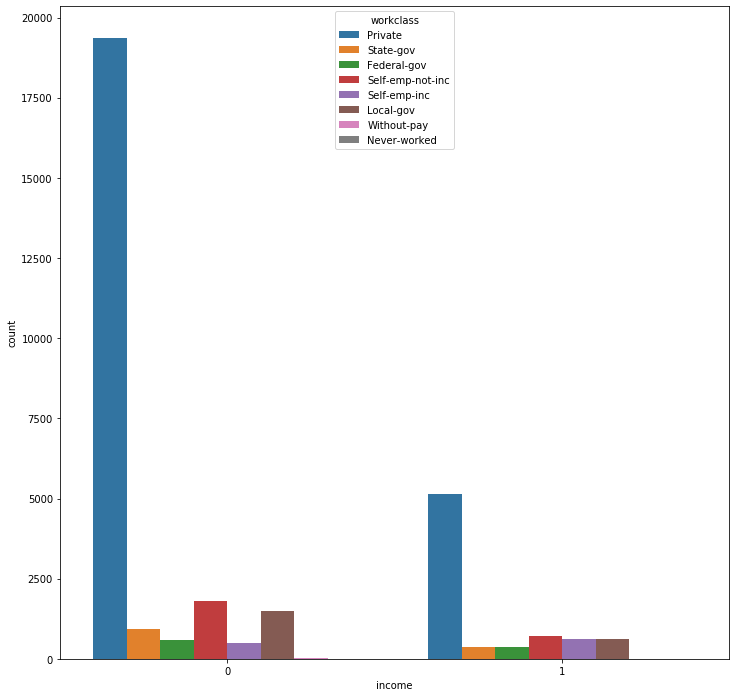

In [25]:
#Plotting workclass corresponding to the income

sns.countplot(x = 'income', hue = 'workclass', data = dataset)

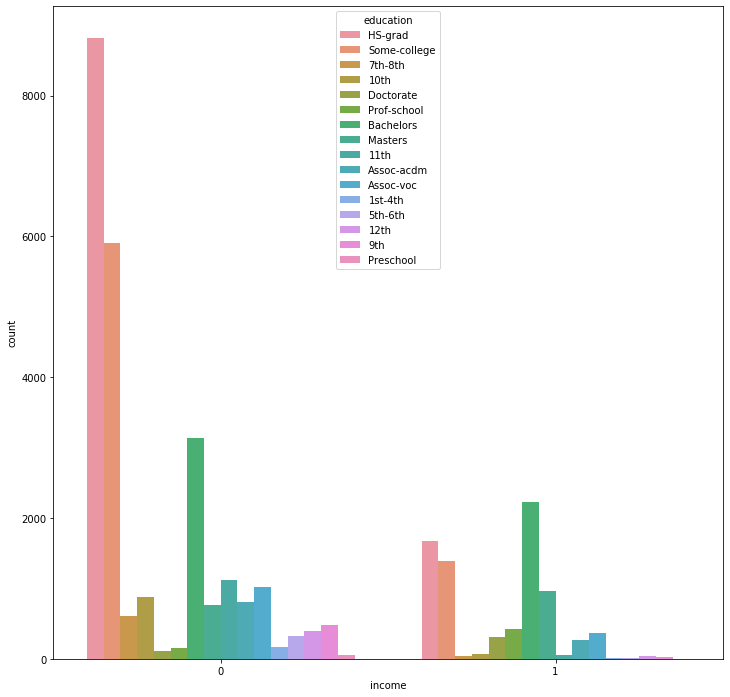

In [26]:
#Plot of education corresponding to income

sns.countplot(x = 'income', hue = 'education', data = dataset)

In [27]:
#Combining the lower grades of education together

df.drop(['education.num'], axis = 1, inplace = True)
df['education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'],
                             ' School', inplace = True)
df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
 School          4253
Masters          1723
Assoc-voc        1382
Assoc-acdm       1067
Prof-school       576
Doctorate         413
Name: education, dtype: int64

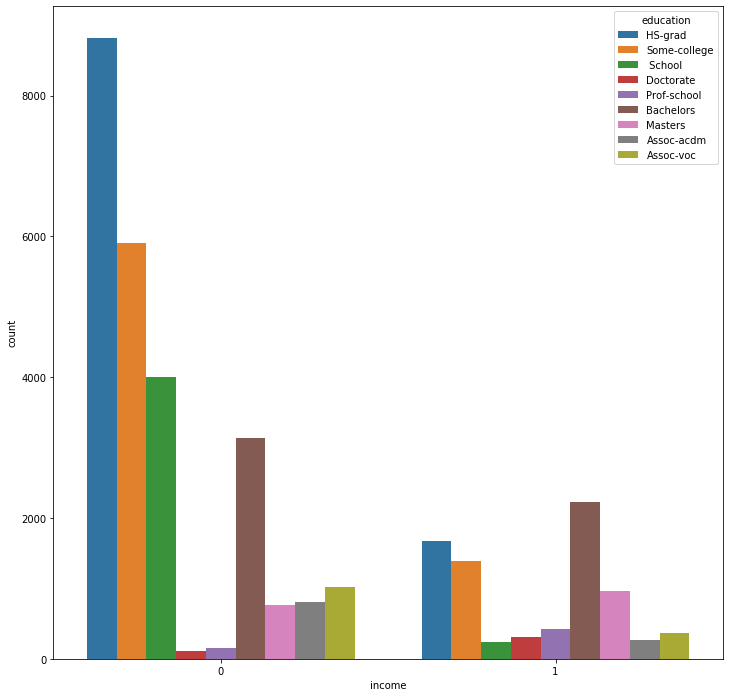

In [28]:
sns.countplot(x = 'income', hue = 'education', data = df)

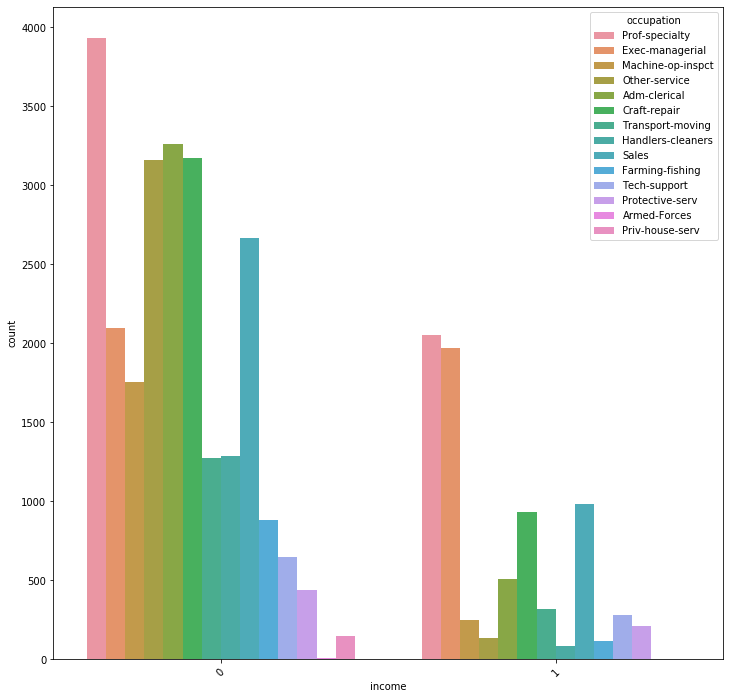

In [29]:
#Plot of occupation corresponding to the income

plt.xticks(rotation = 45)
sns.countplot(x = 'income', hue = 'occupation', data = dataset)

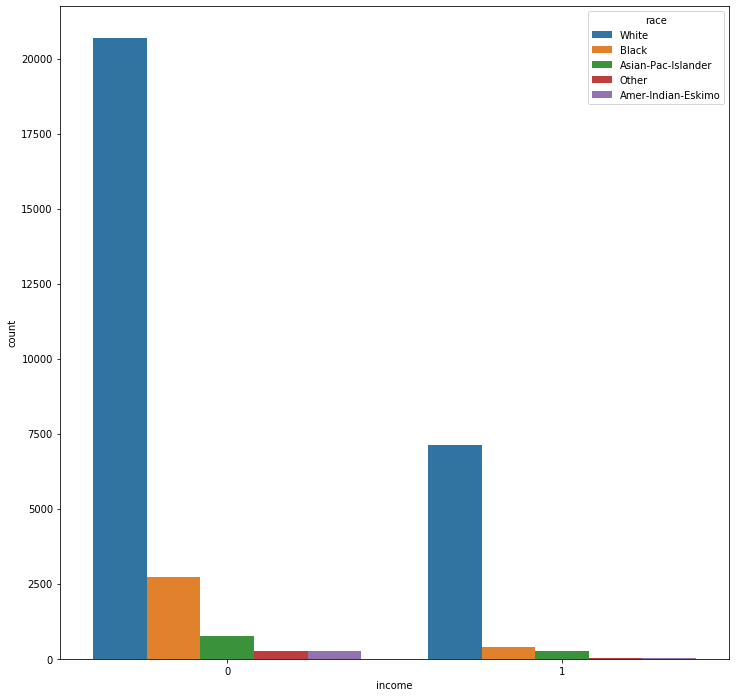

In [30]:
sns.countplot(x = 'income', hue = 'race', data = dataset)

In [0]:
#Since majority of race is white, the rest of races can be combined together to form a new group

df['race'].unique()
df['race'].replace(['Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],' Other', inplace = True)

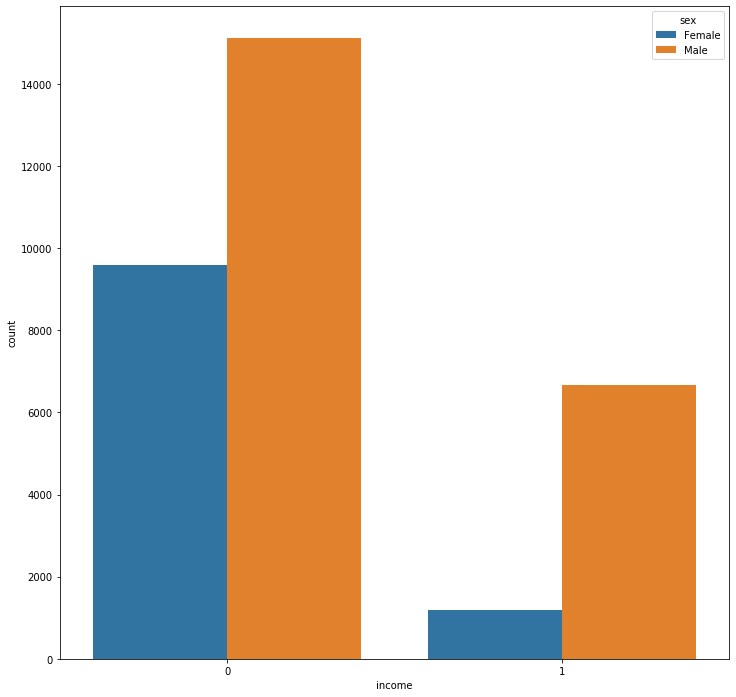

In [32]:
#Plot of sex corresponding to income

sns.countplot(x = 'income', hue = 'sex', data = dataset)

In [33]:
count = dataset['native.country'].value_counts()
count

United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

Text(0.5, 1.0, 'Count from each Country')

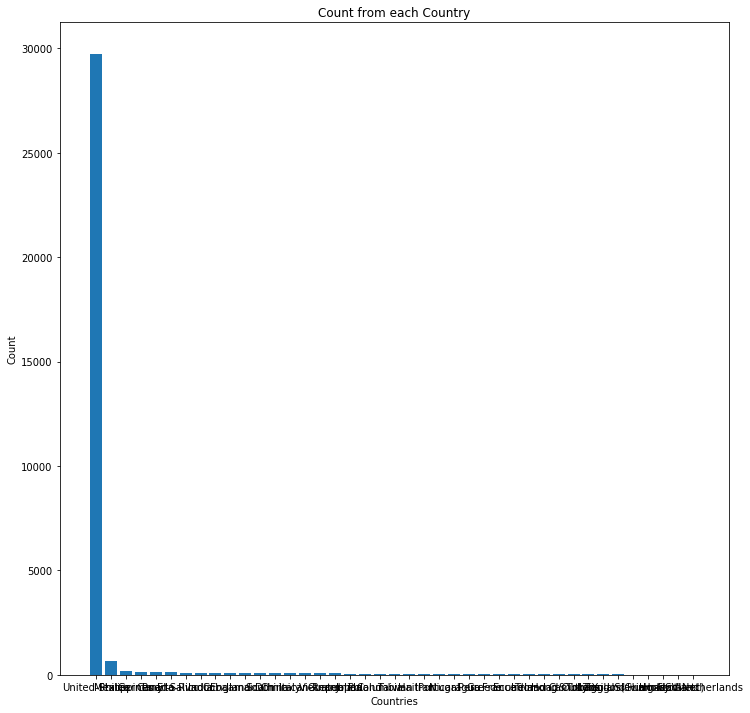

In [34]:
#Plot of Country corresponding to income


plt.bar(count.index, count.values)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Count from each Country')

In [0]:
#Combining all other into one class

countries = np.array(dataset['native.country'].unique())
countries = np.delete(countries, 0)

In [0]:
dataset['native.country'].replace(countries, 'Other', inplace = True)
df['native.country'].replace(countries, 'Other', inplace = True)

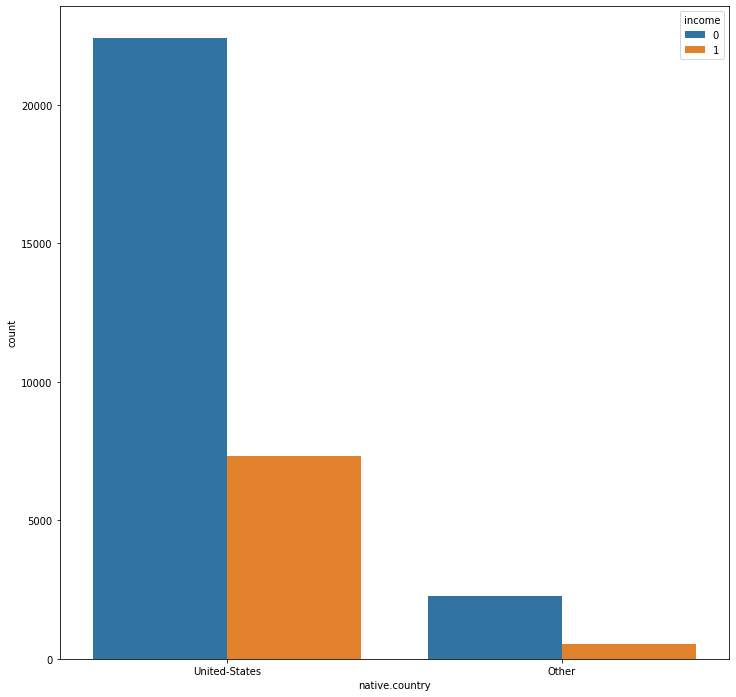

In [37]:
sns.countplot(x = 'native.country', hue = 'income', data = dataset)

In [0]:
#Splitting the data set into features and outcome

X = df.drop(['income'], axis=1)
Y = df['income']

In [39]:
X.head()

,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,Private,HS-grad,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States
1,82,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States
2,66,Private,Some-college,Widowed,Prof-specialty,Unmarried,Other,Female,0,4356,40,United-States
3,54,Private,School,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States
4,41,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States


In [0]:
#Splitting the data into test data and training data

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [41]:
from sklearn import preprocessing

categorical = ['workclass','education', 'marital.status', 'occupation', 'relationship','race', 'sex','native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [0]:
#Using StandardScalar to normalise the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [43]:
X_train.head()

,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0.101484,2.600478,-0.577377,-0.402341,-0.782234,2.214196,0.412408,-1.430470,-0.145189,-0.217407,-1.662414,0.308273
1,0.028248,-1.884720,0.193090,-0.402341,-0.026696,-0.899410,0.412408,0.699071,-0.145189,-0.217407,-0.200753,0.308273
2,0.247956,-0.090641,1.348790,0.926666,-0.782234,-0.276689,0.412408,-1.430470,-0.145189,-0.217407,-0.038346,0.308273
3,-0.850587,-1.884720,0.193090,0.926666,-0.530388,0.968753,0.412408,0.699071,-0.145189,-0.217407,-0.038346,0.308273
4,-0.044989,-2.781760,0.578323,-0.402341,-0.782234,-0.899410,0.412408,0.699071,-0.145189,-0.217407,-0.038346,0.308273


In [0]:
#Applying the random forest algorithm

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [45]:
#Applying the Logistic Regression algorithm

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train) 
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [0]:
#Applying the GaussianNB algorithm

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [48]:
#Applying the Support Vector Machine algorithm

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [0]:
#Applying the Decision Tree algorithm

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)


In [50]:
#Plotting the accuracy of the used algorithms to find the best fit

results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(7)

,Model
Score,
97.98,Random Forest
97.98,Decision Tree
89.79,KNN
80.52,Support Vector Machines
80.35,Logistic Regression
79.72,Naive Bayes


In [51]:
#Finding significance of each feature in t5he best fit model

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
age,0.231
capital.gain,0.133
relationship,0.132
hours.per.week,0.115
education,0.105
occupation,0.094
marital.status,0.056
workclass,0.051
capital.loss,0.046


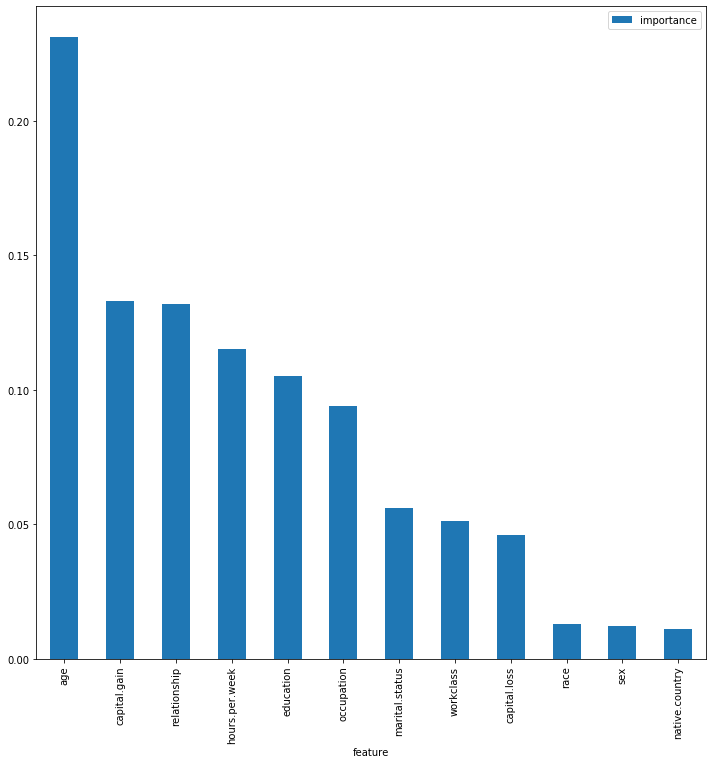

In [52]:
#Plotting the significance of each feautre

importances.plot.bar()

In [0]:
#Since they hardly have any significance, can drop these columns to avoid overfitting

df  = df.drop("sex", axis=1)
df  = df.drop("race", axis=1)
df  = df.drop("native.country", axis=1)

In [54]:
#The accuracy remains the same even after dropping the columns

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

97.98 %
